---
format:
  html:
    self-contained: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
# Code Here
#!pip install palmerpenguins
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from palmerpenguins import load_penguins
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

penguins = load_penguins()
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [ ]:
# Code Here

from sklearn.compose import ColumnTransformer

K = 3

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["island", "sex"]),
    ("standardize", StandardScaler(), ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'])
  ],
  remainder = "drop"
)

knn_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ('classification', KNeighborsClassifier(n_neighbors=K))
    ]
)

In [ ]:
#Model 1 - KNN, K = 3
X = penguins[['bill_depth_mm', 'island', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

K = 3

knn = knn_pipeline.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

confusion = confusion_matrix(y_test, knn_pred)
print(confusion)

accuracy = accuracy_score(y_test, knn_pred)
print(accuracy)

[[28  0  0]
 [ 1 12  0]
 [ 0  0 26]]
0.9850746268656716


In [ ]:
precision = precision_score(y_test, knn_pred, average = None)
print(precision)
recall = recall_score(y_test, knn_pred, average = None)
print(recall)
f1 = f1_score(y_test, knn_pred, average = None)
print(f1)

[0.96551724 1.         1.        ]
[1.         0.92307692 1.        ]
[0.98245614 0.96       1.        ]


In [ ]:
prob = knn.predict_proba(X_test)
roc_auc_score(y_test, prob, multi_class = "ovr")

0.9996099579432913

Text(0, 0.5, 'True Positive Rate')

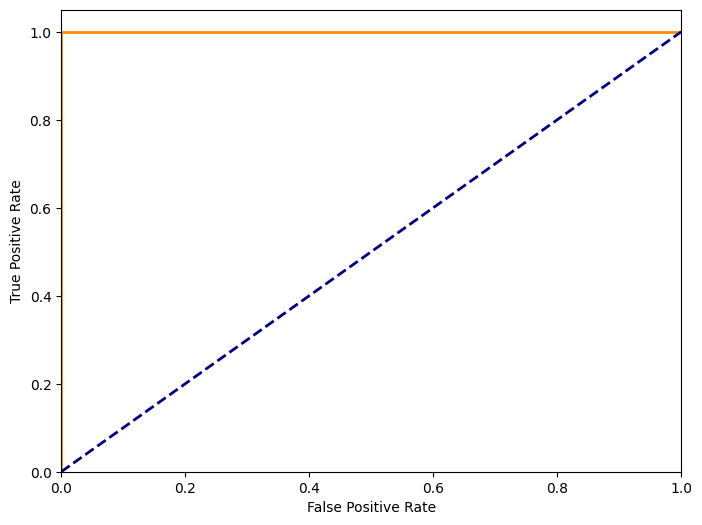

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize the output
y_test_bin = label_binarize(y_test, classes=['Adelie', 'Chinstrap', 'Gentoo'])

# Fit classifier
classifier = OneVsRestClassifier(knn_pipeline)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(['Adelie', 'Chinstrap', 'Gentoo'])):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))

# Specify the class for which you want to plot the ROC curve
class_index = 0  # Adelie

plt.plot(fpr[class_index], tpr[class_index], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc[class_index]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
#Model 2 - KNN, K = 5
K = 5

knn_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ('classification', KNeighborsClassifier(n_neighbors=K))
    ]
)

knn = knn_pipeline.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

confusion = confusion_matrix(y_test, knn_pred)
print(confusion)

accuracy = accuracy_score(y_test, knn_pred)
print(accuracy)

[[28  0  0]
 [ 0 13  0]
 [ 0  0 26]]
1.0


In [ ]:
precision = precision_score(y_test, knn_pred, average = None)
print(precision)
recall = recall_score(y_test, knn_pred, average = None)
print(recall)
f1 = f1_score(y_test, knn_pred, average = None)
print(f1)

[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


In [ ]:
prob = knn.predict_proba(X_test)
roc_auc_score(y_test, prob, multi_class = "ovr")

1.0

In [ ]:
#Model 3 - Decision Tree, Unrestricted
tree_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ('classification', DecisionTreeClassifier(random_state=1))
    ]
)

tree = tree_pipeline.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

confusion = confusion_matrix(y_test, tree_pred)
print(confusion)

accuracy = accuracy_score(y_test, tree_pred)
print(accuracy)

[[28  0  0]
 [ 3 10  0]
 [ 0  0 26]]
0.9552238805970149


In [ ]:
precision = precision_score(y_test, tree_pred, average = None)
print(precision)
recall = recall_score(y_test, tree_pred, average = None)
print(recall)
f1 = f1_score(y_test, tree_pred, average = None)
print(f1)

[0.90322581 1.         1.        ]
[1.         0.76923077 1.        ]
[0.94915254 0.86956522 1.        ]


In [ ]:
prob = tree.predict_proba(X_test)
roc_auc_score(y_test, prob, multi_class = "ovr")

0.9487179487179488

In [ ]:
#Model 4 - Decision Tree, Max Depth 3
tree_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ('classification', DecisionTreeClassifier(random_state=1, max_depth = 3))
    ]
)

tree = tree_pipeline.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

confusion = confusion_matrix(y_test, tree_pred)
print(confusion)

accuracy = accuracy_score(y_test, tree_pred)
print(accuracy)

[[27  1  0]
 [ 3 10  0]
 [ 1  0 25]]
0.9253731343283582


In [ ]:
precision = precision_score(y_test, tree_pred, average = None)
print(precision)
recall = recall_score(y_test, tree_pred, average = None)
print(recall)
f1 = f1_score(y_test, tree_pred, average = None)
print(f1)

[0.87096774 0.90909091 1.        ]
[0.96428571 0.76923077 0.96153846]
[0.91525424 0.83333333 0.98039216]


In [ ]:
prob = tree.predict_proba(X_test)
roc_auc_score(y_test, prob, multi_class = "ovr")

0.9839838721952542